In [8]:
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt#, seaborn as sns
%matplotlib inline
mpl.style.use('classic')

Symbolic math  

Definitions

$Y=[α\cdot F^{-\rho}+(1-α)\cdot R^{-\rho} ]^{-1/\rho}$ Arrow 1961

MIT: $Y=[α\cdot F^{\rho}+(1-α)\cdot R^{\rho} ]^{1/\rho}$   http://www.sciencedirect.com/science/article/pii/S0140988306000624?np=y Eq. 1

$\sigma = \frac{1}{1+\rho}$

MIT: $\sigma = \frac{1}{1-\rho}$

In [9]:
from sympy import *
init_printing() 

In [10]:
a = Symbol('alpha')
s = Symbol('sigma')
r = Symbol('rho')
var('Y F R C c_f c_r');

In [11]:
eq=Eq(Y,(a*F**-r+(1-a)*R**-r)**(-1/r))
eq  #main CES equation
    #Y = value of function - analogous to energy demand?
    #R = renewables
    #F = fossils
    #alfa = fossil share
    #rho = factor related to elasticity of substituion

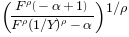

In [12]:
R_sol=solve(eq,R)[0]
R_sol #expression of R from the main CES equation

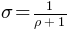

In [13]:
eq2=Eq(s,1/(1+r))
eq2 #definition of elasticity of substituion
    #rho = elasticity of substitution

In [14]:
r_sol=solve(eq2,r)[0]
r_sol #exression of rho in terms of sigma

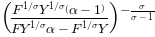

In [15]:
[RR_sol,rr_sol]=solve([eq,eq2],[R,r])[0]
RR_sol #expression of R in terms of sigma

In [16]:
Y_sol=solve(eq,Y)[0]
Y_sol #expression of Y in terms of sigma = main expression

In [17]:
YR_sol=solve([eq,eq2],[Y,r])[0][0]
YR_sol #expression of Y in terms of sigma

Sample policy calculation replicated from page 60 of http://globalchange.mit.edu/files/document/MITJPSPGC_Rpt125.pdf (EPPA).

In [18]:
s_fix=0.4 #fixed elasticity for demand, EPPA pag. 24
s_fix2=0.5 #fixed elasticity for production, EPPA pag. 17

In [19]:
step=1 #step size for numerical calculation
years=np.arange(2015,2100+step,step)
years #years to complete transition (fossil phase-out) 

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [20]:
gamma=0.00 #demand increase rate PER YEAR
Y_zero=100 #initial demand

In [21]:
init_F=0.95 #initial fossil share, estimation from EPPA pag. 62, fig. 20
F_fix=np.array([init_F*Y_zero*(1.0-1.0/(len(years)-1)*i) for i in range(len(years))])
F_fix #array of predefined fossil values (in order complete the transition as defined by years)

array([ 95.        ,  93.88235294,  92.76470588,  91.64705882,
        90.52941176,  89.41176471,  88.29411765,  87.17647059,
        86.05882353,  84.94117647,  83.82352941,  82.70588235,
        81.58823529,  80.47058824,  79.35294118,  78.23529412,
        77.11764706,  76.        ,  74.88235294,  73.76470588,
        72.64705882,  71.52941176,  70.41176471,  69.29411765,
        68.17647059,  67.05882353,  65.94117647,  64.82352941,
        63.70588235,  62.58823529,  61.47058824,  60.35294118,
        59.23529412,  58.11764706,  57.        ,  55.88235294,
        54.76470588,  53.64705882,  52.52941176,  51.41176471,
        50.29411765,  49.17647059,  48.05882353,  46.94117647,
        45.82352941,  44.70588235,  43.58823529,  42.47058824,
        41.35294118,  40.23529412,  39.11764706,  38.        ,
        36.88235294,  35.76470588,  34.64705882,  33.52941176,
        32.41176471,  31.29411765,  30.17647059,  29.05882353,
        27.94117647,  26.82352941,  25.70588235,  24.58

In [22]:
#calculate Y_fix_zero through resubstituting initial values into CES
Y_fix_zero=YR_sol.subs([[R,Y_zero*(1-init_F)],[F,Y_zero*init_F],[a,init_F],[s,s_fix2]])
Y_fix=np.array([Y_fix_zero*((1+gamma*step)**i) for i in range(len(years))])
Y_fix #array of predefined demand values

array([50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000, 50.0000000000000, 50.0000000000000,
       50.0000000000000,

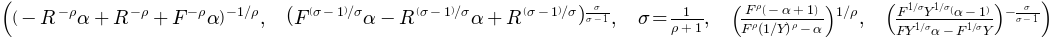

In [23]:
Y_sol, YR_sol, eq2, R_sol, RR_sol

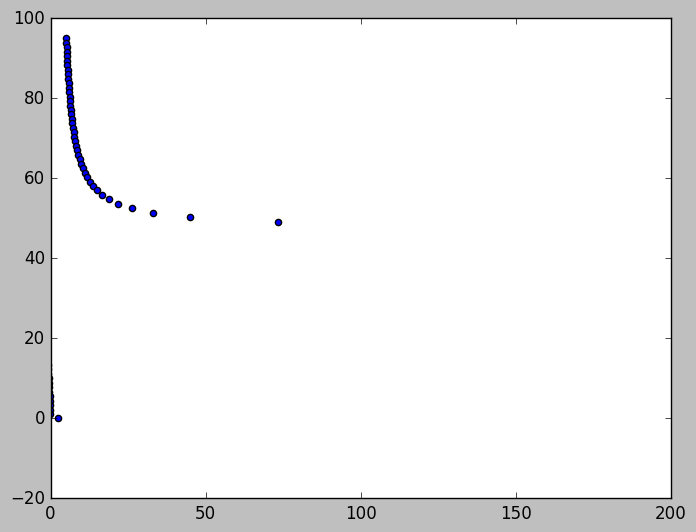

In [24]:
R_fix=[RR_sol.subs([[Y,Y_fix[k]],[F,F_fix[k]],[s,s_fix2],[a,init_F]]) for k in range(len(F_fix))]
plt.scatter(R_fix,F_fix)
plt.xlim(0,200);

Carbon tax

In [25]:
eq3=Eq(c_r,c_f/((a/(1-a))*(F/R)**(-1-r)))
eq3 #cost of R compared to F
    #c_f fixed cost of F

In [26]:
c_r_sol=solve(eq3,c_r)[0]
c_r_sol #cost of R expressed in terms of rho

In [27]:
cR_r_sol=solve([eq3,eq2],[c_r,r])[0][0]
cR_r_sol #cost of R expressed in terms of sigma

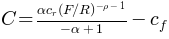

In [28]:
eq4=Eq(C,c_r*((a/(1-a))*(F/R)**(-1-r))-c_f)
eq4 #carbon tax: relative cost of F compared to R - fixed cost of F

In [29]:
C_sol=solve(eq4,C)[0]
C_sol #expression of C in terms of sigma, F, R, a, c_f

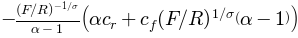

In [30]:
CR_sol=solve([eq4,eq2],[C,r])[0][0]
CR_sol #expression of C in terms of rho, F, R, a, c_f

In [31]:
c_f_fix=1 #cost of fossil, taken 1 to normalize
zeta=0.00 #R cost decrease rate PER YEAR
k=0
c_r_fix_zero=cR_r_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix2],[a,init_F],[c_f,c_f_fix]])
c_r_fix=np.array([c_r_fix_zero*((1-zeta*step)**i) for i in range(len(years))])
c_r_fix #array of predefined R cost values, based on cost decrease rate zeta

array([19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000, 19.0000000000000, 19.0000000000000,
       19.0000000000000,

In [32]:
C_sol

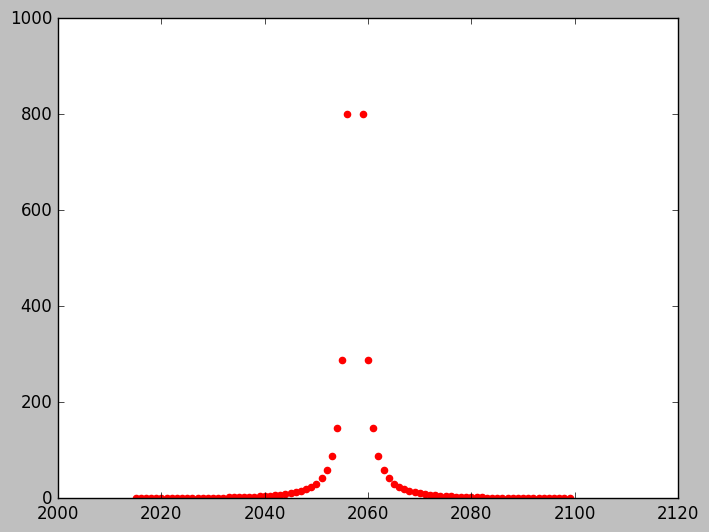

In [33]:
C_fix=[CR_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix2],[a,init_F],[c_f,c_f_fix],[c_r,c_r_fix[k]]])\
       for k in range(len(F_fix))]
plt.scatter(years[:-1],C_fix[:-1],color='r')
plt.ylim(0,1000);

In [34]:
def ces(init_F=0.75,s_fix=0.5,zeta=0.0,gamma=0.0,step=1):
    years=np.arange(2015,2100+step,step)
    Y_zero=100 #initial demand
    F_fix=np.array([init_F*Y_zero*(1.0-1.0/(len(years)-1)*i) for i in range(len(years))])
    Y_fix_zero=YR_sol.subs([[R,Y_zero*(1-init_F)],[F,Y_zero*init_F],[a,init_F],[s,s_fix]])
    Y_fix=np.array([Y_fix_zero*((1+gamma*step)**i) for i in range(len(years))])
    R_fix=[RR_sol.subs([[Y,Y_fix[k]],[F,F_fix[k]],[s,s_fix],[a,init_F]]) for k in range(len(F_fix))]
    
    R_fix=[i for i in R_fix if np.complex(i).imag==0]
    R_fix=[i for i in R_fix if i>0]
    
    k=0
    c_f_fix=1 #cost of fossil, taken 1 to normalize
    c_r_fix_zero=cR_r_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix],[a,init_F],[c_f,c_f_fix]])
    c_r_fix=np.array([c_r_fix_zero*((1-zeta*step)**i) for i in range(len(years))])
    C_fix=[CR_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix],[a,init_F],[c_f,c_f_fix],[c_r,c_r_fix[k]]])\
       for k in range(len(R_fix))]
    
    return [R_fix[:-1],F_fix[:len(R_fix)-1],C_fix[:len(R_fix)-1]]

In [35]:
mwd=[]

init_F0= [0.85,0.9,0.95]
s_fix0 = [0.5, 1.25, 2.0]
init_F= [init_F0[i] for i in range(len(init_F0)) for j in range(len(s_fix0))]
s_fix = [s_fix0[j] for i in range(len(init_F0)) for j in range(len(s_fix0))]

for i in range(len(init_F)):
    
    [x,y,c]=ces(init_F[i],s_fix[i])
    [x2,y2,c2]=ces(init_F[i],s_fix[i],0.01)
    
    mwd.append({})
    for e in range(len(x)):
        mwd[i][2015+e]={"y":y[e],"x":x[e],"c":c[e],"y2":y[e],"x2":x[e],"c2":c2[e],}

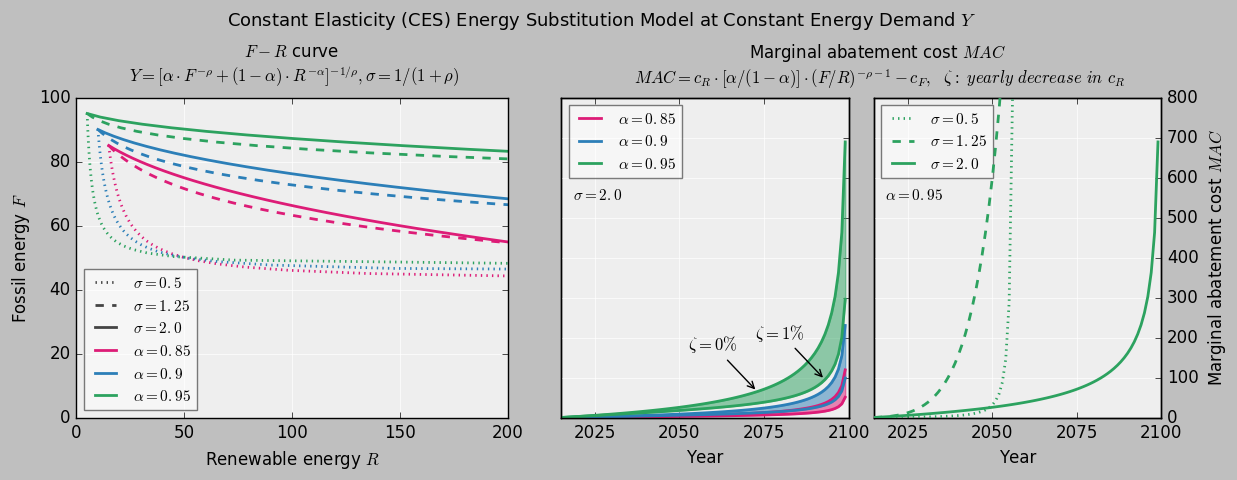

In [36]:
fig = plt.subplots(1,3,figsize=(14,4))
lw=2

gs = mpl.gridspec.GridSpec(1, 4,width_ratios=[1.5,0.01,1,1])
bg=['#EEEEEE','none','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(wspace = .1)
ax[1].spines['top'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].spines['left'].set_color('none')
ax[1].spines['right'].set_color('none')

ls0=[":","--","-"]
ss0=["","",""]
ls = [ls0[j] for i in range(len(init_F0)) for j in range(len(s_fix0))]
ss = [ss0[j] for i in range(len(init_F0)) for j in range(len(s_fix0))]
colors0=["#dd1c77","#2c7fb8","#2ca25f"]
colors=[colors0[i] for i in range(len(init_F0)) for j in range(len(s_fix0))]
ax2=ax[2].twinx()
ax2.set_axisbelow(True) 
ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].set_yticks([])
ax3=ax[3].twinx()
ax3.set_axisbelow(True) 
ax[3].set_yticks([])
ax[2].set_xlim(2015,2100)
ax[2].set_xticks([2025,2050,2075,2100])
ax[3].set_xlim(2015,2100)
ax[3].set_xticks([2025,2050,2075,2100])
ax[0].set_ylim(0,100)
ax2.set_ylim(0,800)
ax3.set_ylim(0,800)
ax[0].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
ax2.grid(color='white', linestyle='solid')
ax3.grid(color='white', linestyle='solid')

for i in range(len(init_F)):
    
    #[x,y,c]=ces(init_F[i],s_fix[i])
    #[x2,y2,c2]=ces(init_F[i],s_fix[i],0.01)
    x=[]
    y=[]
    x2=[]
    y2=[]
    c=[]
    c2=[]
    for e in sorted(mwd[i].keys()):
        x.append(mwd[i][e]["x"])
        y.append(mwd[i][e]["y"])
        c.append(mwd[i][e]["c"])
        x2.append(mwd[i][e]["x2"])
        y2.append(mwd[i][e]["y2"])
        c2.append(mwd[i][e]["c2"])
        
    ax[0].plot(x,y,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
    
    #for legend
    if i in range(len(s_fix0)):
        ax[0].plot([-10],[-10],'#444444',label='$\\sigma='+str(s_fix[i])+'$',linestyle=ls[i],marker=ss[i],linewidth=lw)
        ax3.plot([-10],[-10],'#2ca25f',label='$\\sigma='+str(s_fix[i])+'$',linestyle=ls[i],marker=ss[i],linewidth=lw)
    if i in {2,5,7}:
        ax[0].plot([-10],[-10],label='$\\alpha='+str(init_F[i])+'$',color=colors[i],linewidth=lw)
        ax2.plot([-10],[-10],label='$\\alpha='+str(init_F[i])+'$',color=colors[i],linewidth=lw)
    if i in {2,5,8}:
        ax2.fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)#,zorder=10)
        ax2.plot(years[:len(c)],c2,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
        ax2.plot(years[:len(c)],c,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
    if i in {6,7,8}:
        ax3.plot(years[:len(c)],c,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i],zorder=10)
        if i in {7}:
            ax3.text(0.04,0.72,'$\\alpha='+str(init_F[i])+'$',
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax3.transAxes,fontsize=11)
    if i in {8}:
        ax2.annotate('$\\zeta = 0\%$', xy=(years[58], c[58]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->"))#,zorder=11) 
        ax2.annotate('$\\zeta = 1\%$', xy=(years[78], c2[78]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->"))#,zorder=11) 
        ax2.text(0.04,0.72,'$\\sigma='+str(s_fix[i])+'$',
                horizontalalignment='left',
                verticalalignment='top',
                transform=ax2.transAxes,fontsize=11)

        
ax[0].legend(loc=3,framealpha=0.5,fontsize=11)
ax2.legend(loc=2,framealpha=0.5,fontsize=11)
ax3.legend(loc=2,framealpha=0.5,fontsize=11)
ax[0].set_xlabel(u'Renewable energy $R$')
ax[2].set_xlabel(u'Year')
ax[3].set_xlabel(u'Year')
ax2.set_yticklabels(["","","","","",""])
ax[0].set_ylabel(u'Fossil energy $F$')
ax3.set_ylabel(u'Marginal abatement cost $MAC$')
ax[0].set_title('$F-R$ curve\n $Y=[\\alpha\cdot \
                F^{-\\rho}+(1-\\alpha)\cdot R^{-\\alpha} ]^{-1/\\rho}, \\sigma = 1/(1+\\rho)$',size=12,y=1.02)
ax[2].set_title('Marginal abatement cost $MAC$\n $MAC=c_R \cdot [\\alpha/(1-\\alpha)] \
                \cdot (F/R)^{-\\rho-1} - c_F,$  $\\zeta:$ $yearly$ $decrease$ $in$ $c_R$',size=12,y=1.02,x=1.1)

plt.suptitle(u'Constant Elasticity (CES) Energy Substitution Model at Constant Energy Demand $Y$',fontsize=13,y=1.12)
ax[0].set_xlim(0,2000)
#plt.savefig('ces2-large.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
ax[0].set_xlim(0,200)
#plt.savefig('ces2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [37]:
mwd2=[]

init_F0= [0.85,0.9,0.95]
s_fix0 = [0.5, 1.25, 2.0]
init_F= [init_F0[i] for i in range(len(init_F0)) for j in range(len(s_fix0))]
s_fix = [s_fix0[j] for i in range(len(init_F0)) for j in range(len(s_fix0))]

for i in range(len(init_F)):
    
    [x,y,c]=ces(init_F[i],s_fix[i],0.0,0.03)
    [x2,y2,c2]=ces(init_F[i],s_fix[i],0.01,0.03)
    
    mwd2.append({})
    for e in range(len(x)):
        mwd2[i][2015+e]={"y":y[e],"x":x[e],"c":c[e],"y2":y[e],"x2":x[e],"c2":c2[e],}

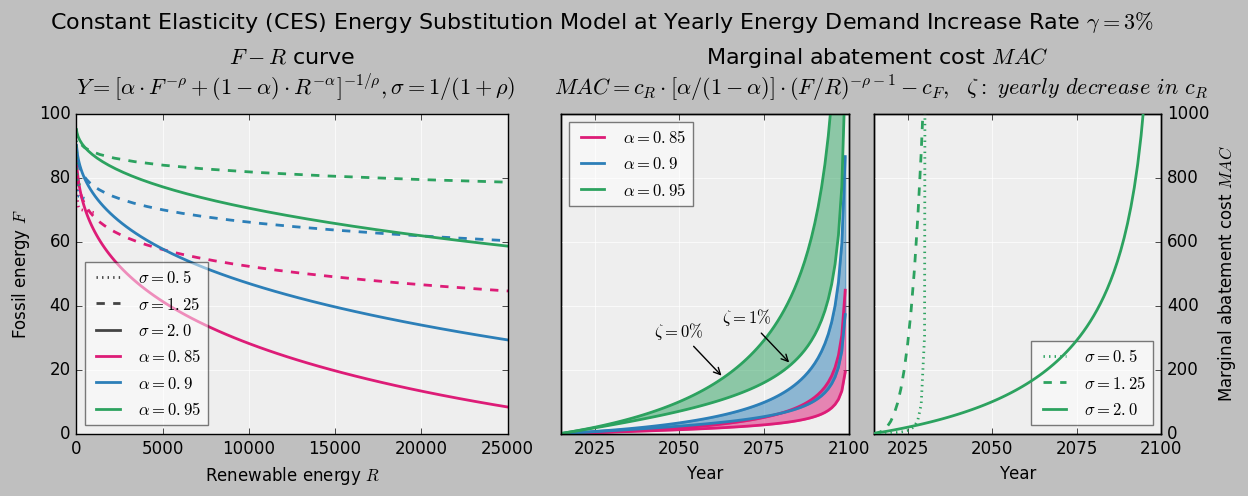

In [41]:
fig = plt.subplots(1,3,figsize=(14,4))
lw=2

gs = mpl.gridspec.GridSpec(1, 4,width_ratios=[1.5,0.01,1,1])
bg=['#EEEEEE','none','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(wspace = .1)
ax[1].spines['top'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].spines['left'].set_color('none')
ax[1].spines['right'].set_color('none')

ax2=ax[2].twinx()
ax2.set_axisbelow(True) 
ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].set_yticks([])
ax3=ax[3].twinx()
ax3.set_axisbelow(True) 
ax[3].set_yticks([])
ax[2].set_xlim(2015,2100)
ax[2].set_xticks([2025,2050,2075,2100])
ax[3].set_xlim(2015,2100)
ax[3].set_xticks([2025,2050,2075,2100])
ax[0].set_ylim(0,100)
ax2.set_ylim(0,1000)
ax3.set_ylim(0,1000)


for i in range(len(init_F)):
    
    [x,y,c]=ces(init_F[i],s_fix[i],0.0,0.03)
    [x2,y2,c2]=ces(init_F[i],s_fix[i],0.01,0.03)
    x=[]
    y=[]
    x2=[]
    y2=[]
    c=[]
    c2=[]
    for e in sorted(mwd2[i].keys()):
        x.append(mwd2[i][e]["x"])
        y.append(mwd2[i][e]["y"])
        c.append(mwd2[i][e]["c"])
        x2.append(mwd2[i][e]["x2"])
        y2.append(mwd2[i][e]["y2"])
        c2.append(mwd2[i][e]["c2"])
    
    ax[0].plot(x,y,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
    
    #for legend
    if i in range(len(s_fix0)):
        ax[0].plot([-10],[-10],'#444444',label='$\\sigma='+str(s_fix[i])+'$',linestyle=ls[i],marker=ss[i],linewidth=lw)
        ax3.plot([-10],[-10],'#2ca25f',label='$\\sigma='+str(s_fix[i])+'$',linestyle=ls[i],marker=ss[i],linewidth=lw)
    if i in {2,5,7}:
        ax[0].plot([-10],[-10],label='$\\alpha='+str(init_F[i])+'$',color=colors[i],linewidth=lw)
        ax2.plot([-10],[-10],label='$\\alpha='+str(init_F[i])+'$',color=colors[i],linewidth=lw)
    if i in {2,5,8}:
        ax2.fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)#,zorder=10)
        ax2.plot(years[:len(c)],c2,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
        ax2.plot(years[:len(c)],c,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i])
    if i in {6,7,8}:
        ax3.plot(years[:len(c)],c,linewidth=lw,linestyle=ls[i],color=colors[i],marker=ss[i],zorder=10)
    if i in {8}:
        ax2.annotate('$\\zeta = 0\%$', xy=(years[48], c[48]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points',fontsize=12, 
                arrowprops=dict(arrowstyle="->"))#,zorder=11) 
        ax2.annotate('$\\zeta = 1\%$', xy=(years[68], c2[68]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points',fontsize=12, 
                arrowprops=dict(arrowstyle="->"))#,zorder=11) 
        
ax[0].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
ax2.grid(color='white', linestyle='solid')
ax3.grid(color='white', linestyle='solid')
ax[0].legend(loc=3,framealpha=0.5,fontsize=12)
ax2.legend(loc=2,framealpha=0.5,fontsize=12)
ax3.legend(loc=4,framealpha=0.5,fontsize=12)
ax[0].set_xlabel(u'Renewable energy $R$',fontsize=12)
ax[2].set_xlabel(u'Year',fontsize=12)
ax[3].set_xlabel(u'Year',fontsize=12)
ax2.set_yticklabels(["","","","","",""])
ax[0].set_ylabel(u'Fossil energy $F$',fontsize=12)
ax3.set_ylabel(u'Marginal abatement cost $MAC$',fontsize=12)
ax[0].set_title('$F-R$ curve\n $Y=[\\alpha\cdot \
                F^{-\\rho}+(1-\\alpha)\cdot R^{-\\alpha} ]^{-1/\\rho}, \\sigma = 1/(1+\\rho)$',size=16,y=1.03)
ax[2].set_title('Marginal abatement cost $MAC$\n $MAC=c_R \cdot [\\alpha/(1-\\alpha)] \
                \cdot (F/R)^{-\\rho-1} - c_F,$  $\\zeta:$ $yearly$ $decrease$ $in$ $c_R$',size=16,y=1.03,x=1.1)

plt.suptitle(u'Constant Elasticity (CES) Energy Substitution Model at Yearly Energy Demand Increase Rate $\\gamma=3\\%$',fontsize=16,y=1.16)
ax[0].set_xlim(0,25000)
plt.savefig('ces3-largex.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
#ax[0].set_xlim(0,200)
#plt.savefig('ces3x.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [ ]:
def sces(init_F=0.75,s_fix=0.5,rf=-1,zeta=0.0,gamma=0.0,step=1):
    #dynamically adjust sigma and resolve equation
    years=np.arange(2015,2100+step,step)
    Y_zero=100 #initial demand
    F_fix=np.array([init_F*Y_zero*(1.0-1.0/(len(years)-1)*i) for i in range(len(years))])
    Y_fix_zero=YR_sol.subs([[R,Y_zero*(1-init_F)],[F,Y_zero*init_F],[a,init_F],[s,s_fix]])
    Y_fix=np.array([Y_fix_zero*((1+gamma*step)**i) for i in range(len(years))])
    #init R_fix, C_fix
    R_fix=[0 for k in range(len(F_fix))]
    C_fix=[0 for k in range(len(F_fix))]
    
    r_fix=solve(eq2,r)[0].subs(s,s_fix)
    r_span=-(rf-r_fix)
    s_fix_k=[]
    r_fix_k=[]
    
    for k in range(len(F_fix)):
        t=1
        s_fix_k.append(solve(eq2,s)[0].subs(r,r_fix)) #append to sigma array
        r_fix_k.append(r_fix) #append to rho array
        #update sigma every t years
        if (k%t==0):
            r_fix=r_fix-(r_span)/len(years) #update rho
            
    R_fix=[RR_sol.subs([[Y,Y_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F]]) for k in range(len(F_fix))]
    
    R_fix=[i for i in R_fix if np.complex(i).imag==0]
    R_fix=[i for i in R_fix if i>0]
    
    k=0
    c_f_fix=1 #cost of fossil, taken 1 to normalize
    c_r_fix_zero=cR_r_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F],[c_f,c_f_fix]])
    c_r_fix=np.array([c_r_fix_zero*((1-zeta*step)**i) for i in range(len(years))])
    C_fix=[CR_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F],[c_f,c_f_fix],[c_r,c_r_fix[k]]])\
       for k in range(len(R_fix))]
    
    return [R_fix[:-1],F_fix[:len(R_fix)-1],C_fix[:len(R_fix)-1],s_fix_k[:len(R_fix)-1],r_fix_k[:len(R_fix)-1]]

In [ ]:
[x,y,c,ys,yr]=sces(0.95,1.5,-1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=sces(0.95,1.5,-1,0.01)
plt.plot(years[:len(c)],c,'--')
[x,y,c,ys,yr]=sces(0.85,1.5,-1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=sces(0.85,1.5,-1,0.01)
plt.plot(years[:len(c)],c,'--')
[x,y,c,ys,yr]=sces(0.90,1.5,-1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=sces(0.90,1.5,-1,0.01)
plt.plot(years[:len(c)],c,'--')

In [ ]:
def dces(init_F=0.75,s_fix=0.5,sf=0.01,zeta=0.0,gamma=0.0,step=1):
    #dynamically adjust sigma and resolve equation
    years=np.arange(2015,2100+step,step)
    Y_zero=100 #initial demand
    F_fix=np.array([init_F*Y_zero*(1.0-1.0/(len(years)-1)*i) for i in range(len(years))])
    Y_fix_zero=YR_sol.subs([[R,Y_zero*(1-init_F)],[F,Y_zero*init_F],[a,init_F],[s,s_fix]])
    Y_fix=np.array([Y_fix_zero*((1+gamma*step)**i) for i in range(len(years))])
    #init R_fix, C_fix
    R_fix=[0 for k in range(len(F_fix))]
    C_fix=[0 for k in range(len(F_fix))]
    
    s_fix_k=[]
    r_fix_k=[]
    
    for k in range(len(F_fix)):
        t=1
        s_fix_k.append(s_fix) #append to sigma array
        r_fix_k.append(solve(eq2,r)[0].subs(s,s_fix)) #append to rho array
        #update sigma every t years
        if (k%t==0):
            s_fix*=1+sf #update rho
            
    R_fix=[RR_sol.subs([[Y,Y_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F]]) for k in range(len(F_fix))]
    
    R_fix=[i for i in R_fix if np.complex(i).imag==0]
    R_fix=[i for i in R_fix if i>0]
    
    k=0
    c_f_fix=1 #cost of fossil, taken 1 to normalize
    c_r_fix_zero=cR_r_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F],[c_f,c_f_fix]])
    c_r_fix=np.array([c_r_fix_zero*((1-zeta*step)**i) for i in range(len(years))])
    C_fix=[CR_sol.subs([[R,R_fix[k]],[F,F_fix[k]],[s,s_fix_k[k]],[a,init_F],[c_f,c_f_fix],[c_r,c_r_fix[k]]])\
       for k in range(len(R_fix))]
    
    return [R_fix[:-1],F_fix[:len(R_fix)-1],C_fix[:len(R_fix)-1],s_fix_k[:len(R_fix)-1],r_fix_k[:len(R_fix)-1]]

In [ ]:
[x,y,c,ys,yr]=dces(0.95,1.5,0.1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=dces(0.95,1.5,0.1,0.01)
plt.plot(years[:len(c)],c,'--')
[x,y,c,ys,yr]=dces(0.85,1.5,0.1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=dces(0.85,1.5,0.1,0.01)
plt.plot(years[:len(c)],c,'--')
[x,y,c,ys,yr]=dces(0.90,1.5,0.1)
plt.plot(years[:len(c)],c)
[x,y,c,ys,yr]=dces(0.90,1.5,0.1,0.01)
plt.plot(years[:len(c)],c,'--')

ERROR! Session/line number was not unique in database. History logging moved to new session 475


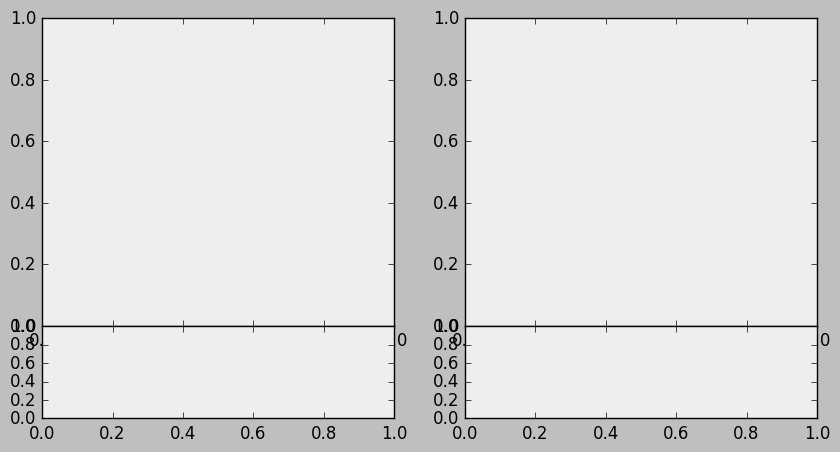

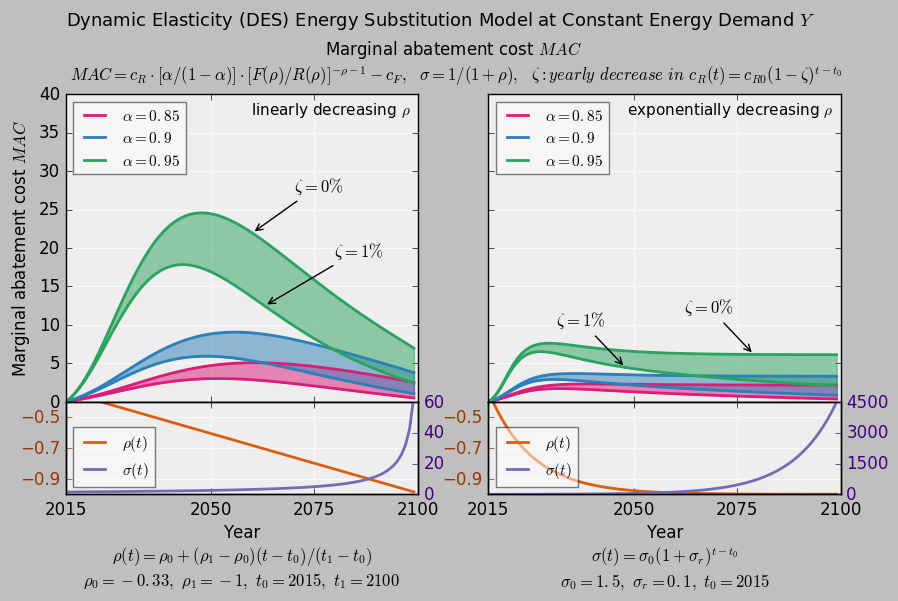

In [97]:
fig = plt.subplots(2,2,figsize=(10,5))
lw=2

gs = mpl.gridspec.GridSpec(2, 2,height_ratios=[1,0.3])
bg=['#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(hspace = .001)

init_F= [0.85,0.9,0.95]
s_fix=1.5
rf=-1
sf=0.1

colors=["#dd1c77","#2c7fb8","#2ca25f"]

for i in range(len(init_F)):
    
    [x2,y2,c2,ys,yr]=sces(init_F[i],s_fix,rf,0.01)
    [x,y,c,ys,yr]=sces(init_F[i],s_fix,rf)
    
    ax[0].fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)
    ax[0].plot(years[:len(c)],c,linewidth=lw,color=colors[i])
    ax[0].plot(years[:len(c)],c2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[2].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[2].tick_params(axis='y', colors='#993404')
        ax[2].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax2=ax[2].twinx()
        ax2.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax2.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[0].annotate('$\\zeta = 0\%$', xy=(years[45], c[45]),  xycoords='data', 
                xytext=(30, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[0].annotate('$\\zeta = 1\%$', xy=(years[48], c2[48]),  xycoords='data', 
                xytext=(50, 36), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
    [x2,y2,c2,ys,yr]=dces(init_F[i],s_fix,sf,0.01)
    [x,y,c,ys,yr]=dces(init_F[i],s_fix,sf)
    
    ax[1].fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)
    ax[1].plot(years[:len(c)],c,linewidth=lw,color=colors[i])
    ax[1].plot(years[:len(c)],c2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[3].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[3].tick_params(axis='y', colors='#993404')
        ax[3].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax3=ax[3].twinx()
        ax3.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax3.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[1].annotate('$\\zeta = 0\%$', xy=(years[64], c[64]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[1].annotate('$\\zeta = 1\%$', xy=(years[33], c2[33]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
        
ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
ax[0].set_xlim(2015,2100)
ax[1].set_xlim(2015,2100)
ax[0].set_xticks([2015,2050,2075,2100])
ax[1].set_xticks([2015,2050,2075,2100])
ax[2].set_xlim(2015,2100)
ax[3].set_xlim(2015,2100)
ax[2].set_xticks([2015,2050,2075,2100])
ax[3].set_xticks([2015,2050,2075,2100])
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[0].set_ylim(0,40)
ax[1].set_ylim(0,40)

ax[2].set_ylim(-1,-.4)
ax[3].set_ylim(-1,-.4)
ax[2].set_yticks([-.5,-.7,-.9])
ax[3].set_yticks([-.5,-.7,-.9])
ax2.set_ylim(0,60)
ax3.set_ylim(0,4500)
ax2.set_yticks([0,20,40,60])
ax3.set_yticks([0,1500,3000,4500])

ax[1].set_yticklabels([])
ax[2].legend(loc=3,framealpha=0.5,fontsize=11)
ax[3].legend(loc=3,framealpha=0.5,fontsize=11)
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[3].set_xlabel(u'Year\n$\\sigma(t)=\\sigma_0(1+\\sigma_r)^{t-t_0}$\n$\\sigma_0=1.5,$ $\\sigma_r=0.1,$ $t_0=2015$')
ax[2].set_xlabel(u'Year\n$\\rho(t) = \\rho_0+(\\rho_1-\\rho_0)(t-t_0)/(t_1-t_0)$\n$\\rho_0=-0.33,$ $\\rho_1=-1,$ $t_0=2015,$ $t_1=2100$')
ax[0].set_ylabel(u'Marginal abatement cost $MAC$')
#[s_fix*(1+sf)**(i-years[0]) for i in years]
ax[0].text(0.98,0.98,'linearly decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=11)
ax[1].text(0.98,0.98,'exponentially decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=11)

ax[0].set_title('Marginal abatement cost $MAC$\n $MAC=c_R \cdot [\\alpha/(1-\\alpha)] \
                \cdot [F(\\rho)/R(\\rho)]^{-\\rho-1} - c_F,$  $\\sigma = 1/(1+\\rho),$  $\\zeta:yearly$ $decrease$ $in$ $c_R(t)=c_{R0}(1-\\zeta)^{t-t_0}$',size=12,y=1.02,x=1.1)
plt.suptitle(u'Dynamic Elasticity (DES) Energy Substitution Model at Constant Energy Demand $Y$',fontsize=13,y=1.07)
plt.savefig('des1.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

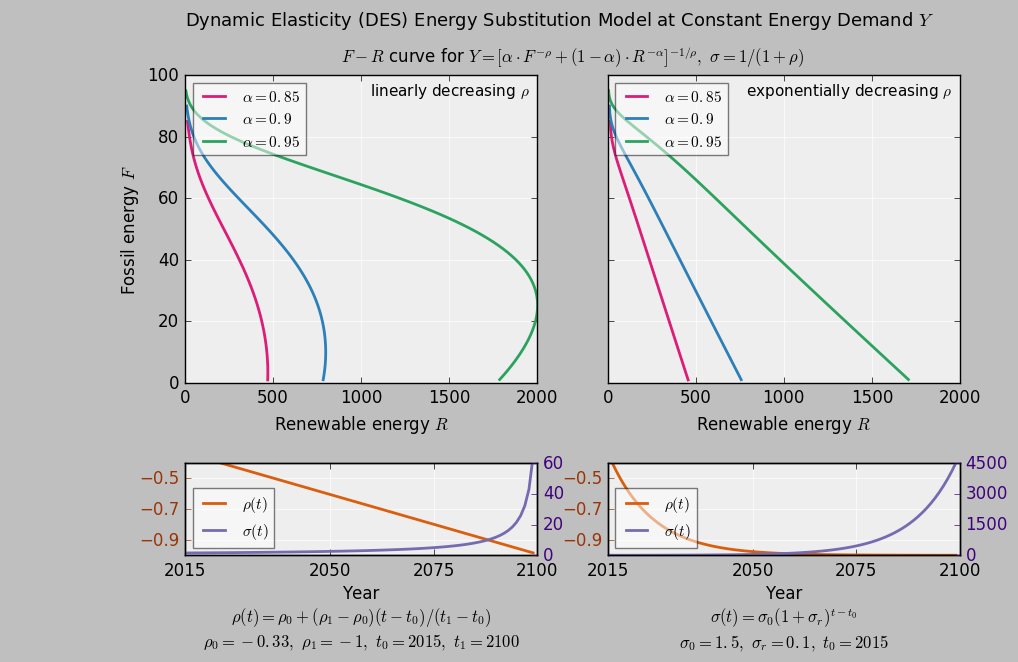

In [116]:
fig = plt.subplots(2,2,figsize=(10,6))
lw=2

gs = mpl.gridspec.GridSpec(2, 2,height_ratios=[1,0.3])
bg=['#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(hspace = .4)

init_F= [0.85,0.9,0.95]
s_fix=1.5
rf=-1
sf=0.1

colors=["#dd1c77","#2c7fb8","#2ca25f"]

for i in range(len(init_F)):
    
    #[x2,y2,c2,ys,yr]=sces(init_F[i],s_fix,rf,0.01)
    [x,y,c,ys,yr]=sces(init_F[i],s_fix,rf)
    
    ax[0].plot(x,y,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    #ax[0].plot(x2,y2,linewidth=lw,color=colors[i])
    if i in {0}:
        ax[2].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[2].tick_params(axis='y', colors='#993404')
        ax[2].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax2=ax[2].twinx()
        ax2.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax2.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[0].annotate('$\\zeta = 0\%$', xy=(years[45], c[45]),  xycoords='data', 
                xytext=(30, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[0].annotate('$\\zeta = 1\%$', xy=(years[48], c2[48]),  xycoords='data', 
                xytext=(50, 36), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
    #[x2,y2,c2,ys,yr]=dces(init_F[i],s_fix,sf,0.01)
    [x,y,c,ys,yr]=dces(init_F[i],s_fix,sf)
    
    ax[1].plot(x,y,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    #ax[1].plot(x2,y2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[3].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[3].tick_params(axis='y', colors='#993404')
        ax[3].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax3=ax[3].twinx()
        ax3.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax3.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[1].annotate('$\\zeta = 0\%$', xy=(years[64], c[64]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[1].annotate('$\\zeta = 1\%$', xy=(years[33], c2[33]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
        
ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
ax[0].set_xlim(0,2000)
ax[1].set_xlim(0,2000)
#ax[0].set_xticks([2015,2050,2075,2100])
#ax[1].set_xticks([2015,2050,2075,2100])
ax[2].set_xlim(2015,2100)
ax[3].set_xlim(2015,2100)
ax[2].set_xticks([2015,2050,2075,2100])
ax[3].set_xticks([2015,2050,2075,2100])
#ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)
ax[0].set_xlabel(u'Renewable energy $R$')
ax[1].set_xlabel(u'Renewable energy $R$')
ax[0].set_ylabel(u'Fossil energy $F$')

ax[2].set_ylim(-1,-.4)
ax[3].set_ylim(-1,-.4)
ax[2].set_yticks([-.5,-.7,-.9])
ax[3].set_yticks([-.5,-.7,-.9])
ax2.set_ylim(0,60)
ax3.set_ylim(0,4500)
ax2.set_yticks([0,20,40,60])
ax3.set_yticks([0,1500,3000,4500])

ax[1].set_yticklabels([])
ax[2].legend(loc=3,framealpha=0.5,fontsize=11)
ax[3].legend(loc=3,framealpha=0.5,fontsize=11)
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[3].set_xlabel(u'Year\n$\\sigma(t)=\\sigma_0(1+\\sigma_r)^{t-t_0}$\n$\\sigma_0=1.5,$ $\\sigma_r=0.1,$ $t_0=2015$')
ax[2].set_xlabel(u'Year\n$\\rho(t) = \\rho_0+(\\rho_1-\\rho_0)(t-t_0)/(t_1-t_0)$\n$\\rho_0=-0.33,$ $\\rho_1=-1,$ $t_0=2015,$ $t_1=2100$')
#[s_fix*(1+sf)**(i-years[0]) for i in years]
ax[0].text(0.98,0.98,'linearly decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=11)
ax[1].text(0.98,0.98,'exponentially decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=11)

ax[0].set_title('$F-R$ curve for $Y=[\\alpha\cdot \
                F^{-\\rho}+(1-\\alpha)\cdot R^{-\\alpha} ]^{-1/\\rho},$ $\\sigma = 1/(1+\\rho)$',size=12,y=1.02,x=1.1)
plt.suptitle(u'Dynamic Elasticity (DES) Energy Substitution Model at Constant Energy Demand $Y$',fontsize=13,y=1.01)
plt.savefig('des1b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

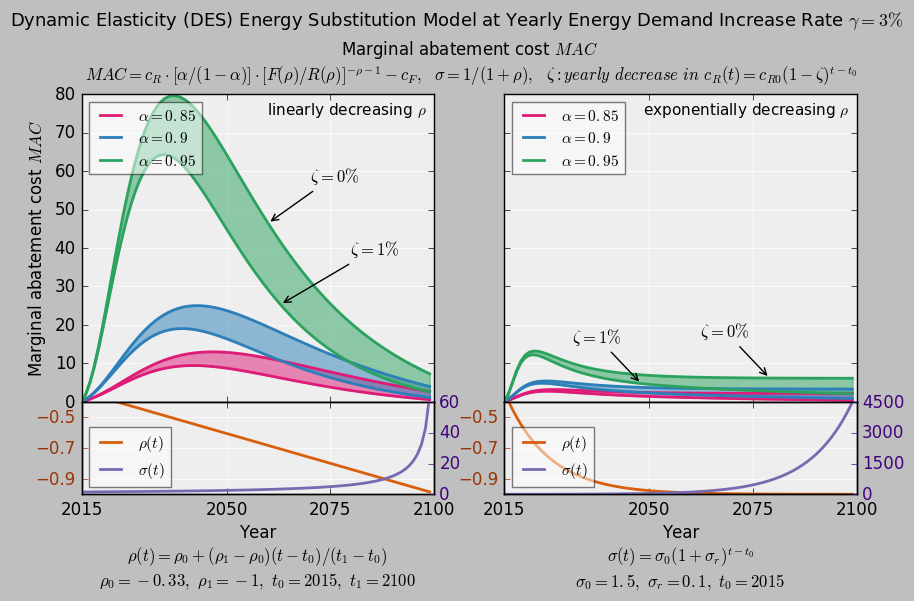

In [115]:
fig = plt.subplots(2,2,figsize=(10,5))
lw=2

gs = mpl.gridspec.GridSpec(2, 2,height_ratios=[1,0.3])
bg=['#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(hspace = .001)

init_F= [0.85,0.9,0.95]
s_fix=1.5
rf=-1
sf=0.1

colors=["#dd1c77","#2c7fb8","#2ca25f"]

for i in range(len(init_F)):
    
    [x2,y2,c2,ys,yr]=sces(init_F[i],s_fix,rf,0.01,0.03)
    [x,y,c,ys,yr]=sces(init_F[i],s_fix,rf,0.0,0.03)
    
    ax[0].fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)
    ax[0].plot(years[:len(c)],c,linewidth=lw,color=colors[i])
    ax[0].plot(years[:len(c)],c2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[2].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[2].tick_params(axis='y', colors='#993404')
        ax[2].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax2=ax[2].twinx()
        ax2.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax2.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[0].annotate('$\\zeta = 0\%$', xy=(years[45], c[45]),  xycoords='data', 
                xytext=(30, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[0].annotate('$\\zeta = 1\%$', xy=(years[48], c2[48]),  xycoords='data', 
                xytext=(50, 36), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
    [x2,y2,c2,ys,yr]=dces(init_F[i],s_fix,sf,0.01,0.03)
    [x,y,c,ys,yr]=dces(init_F[i],s_fix,sf,0.0,0.03)
    
    ax[1].fill_between(np.array(years[:len(c)]).astype(float),np.array(c).astype(float),np.array(c2).astype(float),\
                         color=colors[i],alpha=0.5)
    ax[1].plot(years[:len(c)],c,linewidth=lw,color=colors[i])
    ax[1].plot(years[:len(c)],c2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[3].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[3].tick_params(axis='y', colors='#993404')
        ax[3].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax3=ax[3].twinx()
        ax3.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax3.tick_params(axis='y', colors='#3f007d')
    if i in {2}:
        ax[1].annotate('$\\zeta = 0\%$', xy=(years[64], c[64]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
        ax[1].annotate('$\\zeta = 1\%$', xy=(years[33], c2[33]),  xycoords='data', 
                xytext=(-50, 30), textcoords='offset points', 
                arrowprops=dict(arrowstyle="->")) 
    
        
ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
ax[0].set_xlim(2015,2100)
ax[1].set_xlim(2015,2100)
ax[0].set_xticks([2015,2050,2075,2100])
ax[1].set_xticks([2015,2050,2075,2100])
ax[2].set_xlim(2015,2100)
ax[3].set_xlim(2015,2100)
ax[2].set_xticks([2015,2050,2075,2100])
ax[3].set_xticks([2015,2050,2075,2100])
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[0].set_ylim(0,80)
ax[1].set_ylim(0,80)

ax[2].set_ylim(-1,-.4)
ax[3].set_ylim(-1,-.4)
ax[2].set_yticks([-.5,-.7,-.9])
ax[3].set_yticks([-.5,-.7,-.9])
ax2.set_ylim(0,60)
ax3.set_ylim(0,4500)
ax2.set_yticks([0,20,40,60])
ax3.set_yticks([0,1500,3000,4500])

ax[1].set_yticklabels([])
ax[2].legend(loc=3,framealpha=0.5,fontsize=11)
ax[3].legend(loc=3,framealpha=0.5,fontsize=11)
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[3].set_xlabel(u'Year\n$\\sigma(t)=\\sigma_0(1+\\sigma_r)^{t-t_0}$\n$\\sigma_0=1.5,$ $\\sigma_r=0.1,$ $t_0=2015$')
ax[2].set_xlabel(u'Year\n$\\rho(t) = \\rho_0+(\\rho_1-\\rho_0)(t-t_0)/(t_1-t_0)$\n$\\rho_0=-0.33,$ $\\rho_1=-1,$ $t_0=2015,$ $t_1=2100$')
ax[0].set_ylabel(u'Marginal abatement cost $MAC$')
#[s_fix*(1+sf)**(i-years[0]) for i in years]
ax[0].text(0.98,0.98,'linearly decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=11)
ax[1].text(0.98,0.98,'exponentially decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=11)

ax[0].set_title('Marginal abatement cost $MAC$\n $MAC=c_R \cdot [\\alpha/(1-\\alpha)] \
                \cdot [F(\\rho)/R(\\rho)]^{-\\rho-1} - c_F,$  $\\sigma = 1/(1+\\rho),$  $\\zeta:yearly$ $decrease$ $in$ $c_R(t)=c_{R0}(1-\\zeta)^{t-t_0}$',size=12,y=1.02,x=1.1)
plt.suptitle(u'Dynamic Elasticity (DES) Energy Substitution Model at Yearly Energy Demand Increase Rate $\\gamma=3\\%$',fontsize=13,y=1.07)
plt.savefig('des2x.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

In [119]:
fig = plt.subplots(2,2,figsize=(10,6))
lw=2

gs = mpl.gridspec.GridSpec(2, 2,height_ratios=[1,0.3])
bg=['#EEEEEE','#EEEEEE','#EEEEEE','#EEEEEE']
ax = [plt.subplot(gs[i],axisbg=bg[i],axisbelow=True) for i in range(4)]
plt.subplots_adjust(hspace = .4)

init_F= [0.85,0.9,0.95]
s_fix=1.5
rf=-1
sf=0.1

colors=["#dd1c77","#2c7fb8","#2ca25f"]

for i in range(len(init_F)):
    
    #[x2,y2,c2,ys,yr]=sces(init_F[i],s_fix,rf,0.01)
    [x,y,c,ys,yr]=sces(init_F[i],s_fix,rf,0.0,0.03)
    
    ax[0].plot(x,y,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    #ax[0].plot(x2,y2,linewidth=lw,color=colors[i])
    if i in {0}:
        ax[2].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[2].tick_params(axis='y', colors='#993404')
        ax[2].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax2=ax[2].twinx()
        ax2.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax2.tick_params(axis='y', colors='#3f007d')
    
    #[x2,y2,c2,ys,yr]=dces(init_F[i],s_fix,sf,0.01)
    [x,y,c,ys,yr]=dces(init_F[i],s_fix,sf,0.0,0.03)
    
    ax[1].plot(x,y,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    #ax[1].plot(x2,y2,linewidth=lw,color=colors[i],label='$\\alpha='+str(init_F[i])+'$')
    if i in {0}:
        ax[3].plot(years[:len(yr)],yr,linewidth=lw,color="#d95f0e",label='$\\rho(t)$')
        ax[3].tick_params(axis='y', colors='#993404')
        ax[3].plot([-10],[-10],linewidth=lw,color="#756bb1",label='$\\sigma(t)$')
        ax3=ax[3].twinx()
        ax3.plot(years[:len(ys)],ys,linewidth=lw,color="#756bb1")
        ax3.tick_params(axis='y', colors='#3f007d')
    
        
ax[0].grid(color='white', linestyle='solid')
ax[1].grid(color='white', linestyle='solid')
ax[2].grid(color='white', linestyle='solid')
ax[3].grid(color='white', linestyle='solid')
#ax[0].set_xlim(0,2000)
#ax[1].set_xlim(0,2000)
#ax[0].set_xticks([2015,2050,2075,2100])
#ax[1].set_xticks([2015,2050,2075,2100])
ax[2].set_xlim(2015,2100)
ax[3].set_xlim(2015,2100)
ax[2].set_xticks([2015,2050,2075,2100])
ax[3].set_xticks([2015,2050,2075,2100])
#ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
ax[0].set_ylim(0,100)
ax[1].set_ylim(0,100)
ax[0].set_xlabel(u'Renewable energy $R$')
ax[1].set_xlabel(u'Renewable energy $R$')
ax[0].set_ylabel(u'Fossil energy $F$')

ax[2].set_ylim(-1,-.4)
ax[3].set_ylim(-1,-.4)
ax[2].set_yticks([-.5,-.7,-.9])
ax[3].set_yticks([-.5,-.7,-.9])
ax2.set_ylim(0,60)
ax3.set_ylim(0,4500)
ax2.set_yticks([0,20,40,60])
ax3.set_yticks([0,1500,3000,4500])

ax[1].set_yticklabels([])
ax[2].legend(loc=3,framealpha=0.5,fontsize=11)
ax[3].legend(loc=3,framealpha=0.5,fontsize=11)
ax[0].legend(loc=2,framealpha=0.5,fontsize=11)
ax[1].legend(loc=2,framealpha=0.5,fontsize=11)
ax[3].set_xlabel(u'Year\n$\\sigma(t)=\\sigma_0(1+\\sigma_r)^{t-t_0}$\n$\\sigma_0=1.5,$ $\\sigma_r=0.1,$ $t_0=2015$')
ax[2].set_xlabel(u'Year\n$\\rho(t) = \\rho_0+(\\rho_1-\\rho_0)(t-t_0)/(t_1-t_0)$\n$\\rho_0=-0.33,$ $\\rho_1=-1,$ $t_0=2015,$ $t_1=2100$')
#[s_fix*(1+sf)**(i-years[0]) for i in years]
ax[0].text(0.98,0.98,'linearly decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[0].transAxes,fontsize=11)
ax[1].text(0.98,0.98,'exponentially decreasing $\\rho$',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax[1].transAxes,fontsize=11)

ax[0].set_title('$F-R$ curve for $Y=[\\alpha\cdot \
                F^{-\\rho}+(1-\\alpha)\cdot R^{-\\alpha} ]^{-1/\\rho},$ $\\sigma = 1/(1+\\rho)$',size=12,y=1.02,x=1.1)
plt.suptitle(u'Dynamic Elasticity (DES) Energy Substitution Model at Yearly Energy Demand Increase Rate $\\gamma=3\\%$',fontsize=13,y=1.01)
plt.savefig('des2b.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 